# 0 - VERİ SETİ HAZIRLANMASI


In [1]:
# Veri işlemesi ve analizi kütüphaneleri
import pandas as pd
import numpy as np
# Veri görselleştirme kütüphanleri
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Excel dosyasının yolu
dosya_yolu = r"C:\Users\yusuf\OneDrive\Masaüstü\Laptop_Price_Prediction\notebook.xlsx"

# Excel dosyasını oku ve DataFrame'e aktar
df_ = pd.read_excel(dosya_yolu)

# Kopyalama yaptık
df = df_.copy()

# 1 - VERİYE İLK BAKIŞ

In [3]:
# DataFrame'i görüntüle
df.head(n=4)
# default olarak verseydik 5 tane sonuç döndürür. -> df.head()
# eğer sondan kayıtları listelemek isteseydik -> df.tail()

,Arttırılabilir Azami Bellek,Bağlantılar,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Gücü,Ekran Kartı Hafızası,Ekran Kartı Tipi,...,Temel İşlemci Hızı (GHz),Title,Çözünürlük,Çözünürlük Standartı,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi,Şarjlı Kullanım Süresi
0,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,LOQ 15IAX9 83GS007XTR i5-12450HX 8GB 512 GB SS...,1920 x 1080,Full HD (FHD),Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,NaN
1,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,...,NaN,G15-5530 Intel Core i7-13650HX 16GB 512GB SSD ...,1920 x 1080,Full HD (FHD),13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,NaN
2,16 GB,USB - Bluetooth - HDMI,2 kg ve altı,Yok,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55W,4 GB ve altı,Harici,...,2.3,Abra A5 V21.3 Intel Core i7 12700H 16 GB RAM 5...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Free Dos,4-6 Saat
3,32 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4050,GDDR6,105W,6 GB,Harici,...,3.1,LOQ Intel Core i5-12450HX 16GB 512GB SSD 6GB R...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,6 Saat ve Üstü


In [4]:
df.shape # (satır x sütun)

(1200, 35)

In [5]:
print(df.ndim) # Verinin kaç boyutlu olduğunu gösterir.

2


In [6]:
df.columns

Index(['Arttırılabilir Azami Bellek', 'Bağlantılar', 'Cihaz Ağırlığı',
       'Dokunmatik Ekran', 'Ekran Boyutu', 'Ekran Kartı',
       'Ekran Kartı Bellek Tipi', 'Ekran Kartı Gücü', 'Ekran Kartı Hafızası',
       'Ekran Kartı Tipi', 'Ekran Yenileme Hızı', 'Garanti Süresi',
       'Garanti Tipi', 'Hard Disk Kapasitesi', 'Kapasite', 'Klavye',
       'Kullanım Amacı', 'Maksimum İşlemci Hızı (GHz)', 'Menşei', 'Panel Tipi',
       'Price', 'Ram (Sistem Belleği)', 'Ram (Sistem Belleği) Tipi', 'Renk',
       'SSD Kapasitesi', 'Temel İşlemci Hızı (GHz)', 'Title', 'Çözünürlük',
       'Çözünürlük Standartı', 'İşlemci Modeli', 'İşlemci Nesli',
       'İşlemci Tipi', 'İşlemci Çekirdek Sayısı', 'İşletim Sistemi',
       'Şarjlı Kullanım Süresi'],
      dtype='object')

In [7]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['Arttırılabilir Azami Bellek', 'Bağlantılar', 'Cihaz Ağırlığı', 'Dokunmatik Ekran', 'Ekran Boyutu', 'Ekran Kartı', 'Ekran Kartı Bellek Tipi', 'Ekran Kartı Gücü', 'Ekran Kartı Hafızası', 'Ekran Kartı Tipi', 'Ekran Yenileme Hızı', 'Garanti Süresi', 'Garanti Tipi', 'Hard Disk Kapasitesi', 'Kapasite', 'Klavye', 'Kullanım Amacı', 'Maksimum İşlemci Hızı (GHz)', 'Menşei', 'Panel Tipi', 'Price', 'Ram (Sistem Belleği)', 'Ram (Sistem Belleği) Tipi', 'Renk', 'SSD Kapasitesi', 'Temel İşlemci Hızı (GHz)', 'Title', 'Çözünürlük', 'Çözünürlük Standartı', 'İşlemci Modeli', 'İşlemci Nesli', 'İşlemci Tipi', 'İşlemci Çekirdek Sayısı', 'İşletim Sistemi', 'Şarjlı Kullanım Süresi'] 

Veri seti içerisinde toplam 35 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [8]:
# Veri hakkında bilgi verir.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Arttırılabilir Azami Bellek  810 non-null    object 
 1   Bağlantılar                  1197 non-null   object 
 2   Cihaz Ağırlığı               1200 non-null   object 
 3   Dokunmatik Ekran             1200 non-null   object 
 4   Ekran Boyutu                 1200 non-null   object 
 5   Ekran Kartı                  1200 non-null   object 
 6   Ekran Kartı Bellek Tipi      1200 non-null   object 
 7   Ekran Kartı Gücü             260 non-null    object 
 8   Ekran Kartı Hafızası         1200 non-null   object 
 9   Ekran Kartı Tipi             1200 non-null   object 
 10  Ekran Yenileme Hızı          1200 non-null   object 
 11  Garanti Süresi               1200 non-null   object 
 12  Garanti Tipi                 1200 non-null   object 
 13  Hard Disk Kapasite

In [9]:
# Sütunların hangi tipte olduğunu söyler.
df.dtypes

Arttırılabilir Azami Bellek     object
Bağlantılar                     object
Cihaz Ağırlığı                  object
Dokunmatik Ekran                object
Ekran Boyutu                    object
Ekran Kartı                     object
Ekran Kartı Bellek Tipi         object
Ekran Kartı Gücü                object
Ekran Kartı Hafızası            object
Ekran Kartı Tipi                object
Ekran Yenileme Hızı             object
Garanti Süresi                  object
Garanti Tipi                    object
Hard Disk Kapasitesi            object
Kapasite                        object
Klavye                          object
Kullanım Amacı                  object
Maksimum İşlemci Hızı (GHz)    float64
Menşei                          object
Panel Tipi                      object
Price                           object
Ram (Sistem Belleği)            object
Ram (Sistem Belleği) Tipi       object
Renk                            object
SSD Kapasitesi                  object
Temel İşlemci Hızı (GHz) 

In [10]:
# SSD kapasitesini GB cinsine çevirecek bir fonksiyon
def convert_tb_to_gb(ssd_capacity):
    if 'TB' in ssd_capacity:
        # Eğer TB varsa, GB'ye çevir
        return str(int(ssd_capacity.split()[0]) * 1024) + " GB"  # 1 TB = 1024 GB
    else:
        # GB ise olduğu gibi bırak
        return ssd_capacity

# Sadece TB olanları dönüştürüp yeni bir sütun ekliyoruz
df["SSD Kapasitesi"] = df["SSD Kapasitesi"].apply(convert_tb_to_gb)

In [11]:
df["SSD Kapasitesi"].head(n=20)

0      512 GB
1      512 GB
2      500 GB
3      512 GB
4      500 GB
5     1024 GB
6     1024 GB
7     1024 GB
8     2048 GB
9      512 GB
10     512 GB
11     512 GB
12     512 GB
13    1024 GB
14     512 GB
15     512 GB
16     512 GB
17    1024 GB
18     512 GB
19     512 GB
Name: SSD Kapasitesi, dtype: object

In [12]:
import pandas as pd

# Sayısal sütunlar
sayisal_sutunlar = [
     'Ekran Kartı Gücü',"Ekran Yenileme Hızı", 'Hard Disk Kapasitesi', 'Maksimum İşlemci Hızı (GHz)', 
    'Ram (Sistem Belleği)', 'SSD Kapasitesi', 'İşlemci Çekirdek Sayısı', 'Price'
]

# Virgül haricindeki karakterleri temizleyelim
for col in sayisal_sutunlar:
    if col in df.columns:
        # Sayısal olmayan tüm karakterleri (virgül hariç) temizlemek için regex kullanacağız
        df[col] = df[col].replace(r'[^0-9.,]', '', regex=True)  # Virgül dışındaki her şeyi temizle
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Sayısal türüne dönüştür, hata olanları NaN yapar

# Veriyi yeni bir Excel dosyasına kaydedelim
df.to_excel('cleaned_data.xlsx', index=False)

print("Veri başarıyla 'cleaned_data.xlsx' dosyasına kaydedildi.")

Veri başarıyla 'cleaned_data.xlsx' dosyasına kaydedildi.


In [13]:
# Temizlenmiş Excel dosyasını yükleyelim
df = pd.read_excel('cleaned_data.xlsx')

In [14]:
df.dtypes

Arttırılabilir Azami Bellek     object
Bağlantılar                     object
Cihaz Ağırlığı                  object
Dokunmatik Ekran                object
Ekran Boyutu                    object
Ekran Kartı                     object
Ekran Kartı Bellek Tipi         object
Ekran Kartı Gücü               float64
Ekran Kartı Hafızası            object
Ekran Kartı Tipi                object
Ekran Yenileme Hızı            float64
Garanti Süresi                  object
Garanti Tipi                    object
Hard Disk Kapasitesi           float64
Kapasite                        object
Klavye                          object
Kullanım Amacı                  object
Maksimum İşlemci Hızı (GHz)    float64
Menşei                          object
Panel Tipi                      object
Price                          float64
Ram (Sistem Belleği)             int64
Ram (Sistem Belleği) Tipi       object
Renk                            object
SSD Kapasitesi                 float64
Temel İşlemci Hızı (GHz) 

In [15]:
df.head()

,Arttırılabilir Azami Bellek,Bağlantılar,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Gücü,Ekran Kartı Hafızası,Ekran Kartı Tipi,...,Temel İşlemci Hızı (GHz),Title,Çözünürlük,Çözünürlük Standartı,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi,Şarjlı Kullanım Süresi
0,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,LOQ 15IAX9 83GS007XTR i5-12450HX 8GB 512 GB SS...,1920 x 1080,Full HD (FHD),Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,NaN
1,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,...,NaN,G15-5530 Intel Core i7-13650HX 16GB 512GB SSD ...,1920 x 1080,Full HD (FHD),13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,NaN
2,16 GB,USB - Bluetooth - HDMI,2 kg ve altı,Yok,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55.0,4 GB ve altı,Harici,...,2.3,Abra A5 V21.3 Intel Core i7 12700H 16 GB RAM 5...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Free Dos,4-6 Saat
3,32 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4050,GDDR6,105.0,6 GB,Harici,...,3.1,LOQ Intel Core i5-12450HX 16GB 512GB SSD 6GB R...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,6 Saat ve Üstü
4,64 GB,HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,4 GB ve altı,Harici,...,2.5,Excalibur G770.1245-BVJ0X-B i5-12450H 16GB RAM...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,NaN


In [16]:
df['Ekran Kartı'][:3]

0    Nvidia GeForce RTX 4060
1    Nvidia GeForce RTX 3050
2    Nvidia GeForce RTX 2050
Name: Ekran Kartı, dtype: object

Veri setimizin betimsel istatistiklerine ulaşmak için describe() fonksiyonunu kullanıyoruz.

Bu fonksiyon eksik verileri göz ardı eder ve default olarak yalnızca numerik değişkenlere bakar.

In [17]:
df.describe().T # -> .T eklentisi elde edeceğimiz çıktıyı transpose eder.

# df.describe(include = "all") -> Veri setindeki tüm değişkenleri dahil etmek için include parametresine "all" değerini verebilirsiniz.

,count,mean,std,min,25%,50%,75%,max
Ekran Kartı Gücü,260.0,106.673077,35.070101,45.000,95.000,105.000,140.000,175.000
Ekran Yenileme Hızı,1156.0,160.863322,38.729838,60.000,144.000,144.000,165.000,360.000
Hard Disk Kapasitesi,41.0,244.463415,252.476246,1.000,1.000,2.000,500.000,500.000
Maksimum İşlemci Hızı (GHz),742.0,4.739218,0.264521,4.200,4.500,4.700,5.000,5.000
Price,786.0,48.739373,28.523317,15.049,32.224,41.599,49.999,238.399
Ram (Sistem Belleği),1200.0,30.793333,22.997928,8.000,16.000,24.000,32.000,128.000
SSD Kapasitesi,1195.0,1063.986611,940.029965,256.000,512.000,1024.000,1024.000,8192.000
İşlemci Çekirdek Sayısı,1199.0,12.558799,6.013869,1.000,8.000,12.000,16.000,24.000


In [18]:
df["SSD Kapasitesi"].mode()[0]

1024.0

# 2 - EKSİK VERİ ANALİZİ

Eksik Veri Analizi ile, veri setimizdeki eksik verileri tespit edip bu durumu uygun bir şekilde düzeltmeyi hedefleriz.

Veri seti içerisinde eksik değerler bulunması yapısal bir bozukluğa işaret eder ve mutlaka uygun yöntemlerle ele alınmalıdır.

Eksik veriler, duruma bağlı olarak veri setinden silinebilir veya uygun veriler ile doldurulabilir. Ancak eksik verilerin silinmesi, silinen satır veya sütunlar içerisinde yer alan diğer verilerin kaybedilmesi anlamına gelir. Eksik verilerin doldurulması işleminde ise, veri setine sentetik bir girdi yapacağımızdan dolayı, doldurma işlemleri veri setindeki dağılımları manipüle edebilir (veri setinde yanlılık oluşturabilir).

Eksik verilerin ne sebeple ortaya çıktığı hassas bir şekilde değerlendirilmeli, nasıl ele alınacağı da bu değerlendirme sonucunda uygun şekilde karar verilmelidir.

1. isna() metodu:
Pandas'taki DataFrame veya Series içinde eksik (NaN) değerleri kontrol etmek için kullanılır.
Eğer bir hücrede eksik veri (NaN) varsa, bu hücre için True döner, yoksa False döner.
Boşu true dönderir.

2. isnull() metodu:
isna() metodu ile aynı işlevi görür. Yani, eksik (NaN) değerleri kontrol eder ve her bir hücre için True veya False döner.
Pandas'ta isna() ve isnull() birbirinin yerine kullanılabilir. Aralarındaki fark sadece metod adıdır. Yani, biri diğerine eşdeğerdir.

In [19]:
def save_to_excel(df, file_name="cleaned_data.xlsx"):
    """
    Bu fonksiyon, verilen DataFrame'i belirtilen dosya adına kaydeder.

    Args:
    - df: Pandas DataFrame
    - file_name: Kaydedilecek Excel dosyasının adı
    """
    df.to_excel(file_name, index=False)
    print(f"Dosya '{file_name}' adıyla başarıyla kaydedildi.")

In [20]:

# Sütun adlarını değiştirelim (inplace=True kullanarak)
df.rename(columns={
    'Arttırılabilir Azami Bellek': 'Max_Bellek',
    'Bağlantılar': 'Baglantilar',
    'Cihaz Ağırlığı': 'Agirlik',
    'Dokunmatik Ekran': 'Dokunmatik',
    'Ekran Boyutu': 'Ekran_Boyutu',
    'Ekran Kartı': 'Ekran_Karti',
    'Ekran Kartı Bellek Tipi': 'GPU_Bellek_Tipi',
    'Ekran Kartı Gücü': 'GPU_Gucu',
    'Ekran Kartı Hafızası': 'GPU_Hafizasi',
    'Ekran Kartı Tipi': 'GPU_Tipi',
    'Ekran Yenileme Hızı': 'Yenileme_Hizi',
    'Garanti Süresi': 'Garanti_Suresi',
    'Garanti Tipi': 'Garanti_Tipi',
    'Hard Disk Kapasitesi': 'HDD_Kapasitesi',
    'Kapasite': 'Kapasite',
    'Klavye': 'Klavye',
    'Kullanım Amacı': 'Kullanım_Amaci',
    'Maksimum İşlemci Hızı (GHz)': 'Max_CPU_Hizi_GHz',
    'Menşei': 'Mensei',
    'Panel Tipi': 'Panel_Tipi',
    'Price': 'Fiyat',
    'Ram (Sistem Belleği)': 'RAM',
    'Ram (Sistem Belleği) Tipi': 'RAM_Tipi',
    'Renk': 'Renk',
    'SSD Kapasitesi': 'SSD_Kapasitesi',
    'Temel İşlemci Hızı (GHz)': 'Temel_CPU_Hizi_GHz',
    'Title': 'Baslik',
    'Çözünürlük': 'Cozunurluk',
    'Çözünürlük Standartı': 'Cozunurluk_Standardi',
    'İşlemci Modeli': 'Islemci_Modeli',
    'İşlemci Nesli': 'Islemci_Nesli',
    'İşlemci Tipi': 'Islemci_Tipi',
    'İşlemci Çekirdek Sayısı': 'CPU_Cekirdek_Sayisi',
    'İşletim Sistemi': 'Isletim_Sistemi',
    'Şarjlı Kullanım Süresi': 'Sarjli_Kullanim_Suresi'
}, inplace=True)

save_to_excel(df)

# Yeni sütun adlarını yazdıralım
print(df.columns)




Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.
Index(['Max_Bellek', 'Baglantilar', 'Agirlik', 'Dokunmatik', 'Ekran_Boyutu',
       'Ekran_Karti', 'GPU_Bellek_Tipi', 'GPU_Gucu', 'GPU_Hafizasi',
       'GPU_Tipi', 'Yenileme_Hizi', 'Garanti_Suresi', 'Garanti_Tipi',
       'HDD_Kapasitesi', 'Kapasite', 'Klavye', 'Kullanım_Amaci',
       'Max_CPU_Hizi_GHz', 'Mensei', 'Panel_Tipi', 'Fiyat', 'RAM', 'RAM_Tipi',
       'Renk', 'SSD_Kapasitesi', 'Temel_CPU_Hizi_GHz', 'Baslik', 'Cozunurluk',
       'Cozunurluk_Standardi', 'Islemci_Modeli', 'Islemci_Nesli',
       'Islemci_Tipi', 'CPU_Cekirdek_Sayisi', 'Isletim_Sistemi',
       'Sarjli_Kullanim_Suresi'],
      dtype='object')


In [21]:
df.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.

Max_Bellek                 390
Baglantilar                  3
Agirlik                      0
Dokunmatik                   0
Ekran_Boyutu                 0
Ekran_Karti                  0
GPU_Bellek_Tipi              0
GPU_Gucu                   940
GPU_Hafizasi                 0
GPU_Tipi                     0
Yenileme_Hizi               44
Garanti_Suresi               0
Garanti_Tipi                 0
HDD_Kapasitesi            1159
Kapasite                  1199
Klavye                       0
Kullanım_Amaci               0
Max_CPU_Hizi_GHz           458
Mensei                    1190
Panel_Tipi                   1
Fiyat                      414
RAM                          0
RAM_Tipi                     0
Renk                         0
SSD_Kapasitesi               5
Temel_CPU_Hizi_GHz         767
Baslik                       0
Cozunurluk                   0
Cozunurluk_Standardi         0
Islemci_Modeli               0
Islemci_Nesli                0
Islemci_Tipi                 0
CPU_Ceki

In [22]:
# Eksik değerlerin sayısını ve oranını hesaplama
missing_data = df.isnull().sum()  # Eksik değerlerin sayısını alıyoruz
missing_percentage = (missing_data / len(df)) * 100  # Oranı hesaplıyoruz

In [23]:
missing_percentage

Max_Bellek                32.500000
Baglantilar                0.250000
Agirlik                    0.000000
Dokunmatik                 0.000000
Ekran_Boyutu               0.000000
Ekran_Karti                0.000000
GPU_Bellek_Tipi            0.000000
GPU_Gucu                  78.333333
GPU_Hafizasi               0.000000
GPU_Tipi                   0.000000
Yenileme_Hizi              3.666667
Garanti_Suresi             0.000000
Garanti_Tipi               0.000000
HDD_Kapasitesi            96.583333
Kapasite                  99.916667
Klavye                     0.000000
Kullanım_Amaci             0.000000
Max_CPU_Hizi_GHz          38.166667
Mensei                    99.166667
Panel_Tipi                 0.083333
Fiyat                     34.500000
RAM                        0.000000
RAM_Tipi                   0.000000
Renk                       0.000000
SSD_Kapasitesi             0.416667
Temel_CPU_Hizi_GHz        63.916667
Baslik                     0.000000
Cozunurluk                 0

Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.

In [24]:
df.isna().sum().sum() 

7456

In [25]:
# Her bir sütundaki ne kadar veri olduğunu gösterir.
df.notnull().sum()

Max_Bellek                 810
Baglantilar               1197
Agirlik                   1200
Dokunmatik                1200
Ekran_Boyutu              1200
Ekran_Karti               1200
GPU_Bellek_Tipi           1200
GPU_Gucu                   260
GPU_Hafizasi              1200
GPU_Tipi                  1200
Yenileme_Hizi             1156
Garanti_Suresi            1200
Garanti_Tipi              1200
HDD_Kapasitesi              41
Kapasite                     1
Klavye                    1200
Kullanım_Amaci            1200
Max_CPU_Hizi_GHz           742
Mensei                      10
Panel_Tipi                1199
Fiyat                      786
RAM                       1200
RAM_Tipi                  1200
Renk                      1200
SSD_Kapasitesi            1195
Temel_CPU_Hizi_GHz         433
Baslik                    1200
Cozunurluk                1200
Cozunurluk_Standardi      1200
Islemci_Modeli            1200
Islemci_Nesli             1200
Islemci_Tipi              1200
CPU_Ceki

None ve NaN değerler arasındaki fark nedir?

None (null) değerler ile NaN değerler arasındaki farkın ne olduğunu görmek için güzel bir kaynak: https://medium.com/@allenhuang1996/whats-the-difference-between-null-and-nan-in-python-a1af20d523ce

In [26]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 34544 adet eksik olmayan, 7456 eksik gözlem var.


In [27]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Max_Bellek,Baglantilar,Agirlik,Dokunmatik,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,...,Temel_CPU_Hizi_GHz,Baslik,Cozunurluk,Cozunurluk_Standardi,Islemci_Modeli,Islemci_Nesli,Islemci_Tipi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Sarjli_Kullanim_Suresi
0,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,LOQ 15IAX9 83GS007XTR i5-12450HX 8GB 512 GB SS...,1920 x 1080,Full HD (FHD),Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,NaN
1,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,...,NaN,G15-5530 Intel Core i7-13650HX 16GB 512GB SSD ...,1920 x 1080,Full HD (FHD),13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,NaN
2,16 GB,USB - Bluetooth - HDMI,2 kg ve altı,Yok,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55.0,4 GB ve altı,Harici,...,2.3,Abra A5 V21.3 Intel Core i7 12700H 16 GB RAM 5...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Free Dos,4-6 Saat
3,32 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4050,GDDR6,105.0,6 GB,Harici,...,3.1,LOQ Intel Core i5-12450HX 16GB 512GB SSD 6GB R...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,6 Saat ve Üstü
4,64 GB,HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,4 GB ve altı,Harici,...,2.5,Excalibur G770.1245-BVJ0X-B i5-12450H 16GB RAM...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,64 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"17,3 inç",Nvidia GeForce RTX 4060,GDDR6,105.0,8 GB,Harici,...,1.8,Katana 17 B13VFK37 i7 13620H 96GB 256GB SSD RT...,1920 x 1080,Full HD (FHD),13620H,13. Nesil,Intel Core i7,16.0,Windows,NaN
1196,NaN,USB - Bluetooth - HDMI,2 - 4 kg,Yok,16 inç,Nvidia GeForce RTX 3050 Ti,GDDR6,NaN,4 GB ve altı,Harici,...,NaN,GU603ZE-LS012 INTEL / I7-12700 / 16GB / 512GB ...,1920 x 1200,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Free Dos,NaN
1197,NaN,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,Nitro 5 i7 12700H 48GB 4TB SSD RTX4060/8GB 165...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Windows,NaN
1198,NaN,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,Nitro 5 i7 12700H 32GB 4TB SSD RTX4060/8GB 165...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Windows,NaN


In [28]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,Max_Bellek,Baglantilar,Agirlik,Dokunmatik,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,...,Temel_CPU_Hizi_GHz,Baslik,Cozunurluk,Cozunurluk_Standardi,Islemci_Modeli,Islemci_Nesli,Islemci_Tipi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Sarjli_Kullanim_Suresi


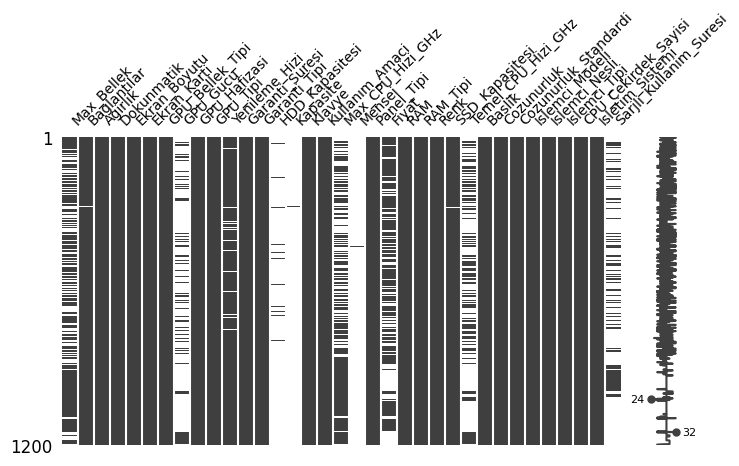

In [29]:
msno.matrix(df, figsize=(8, 4), fontsize=10)

plt.show()

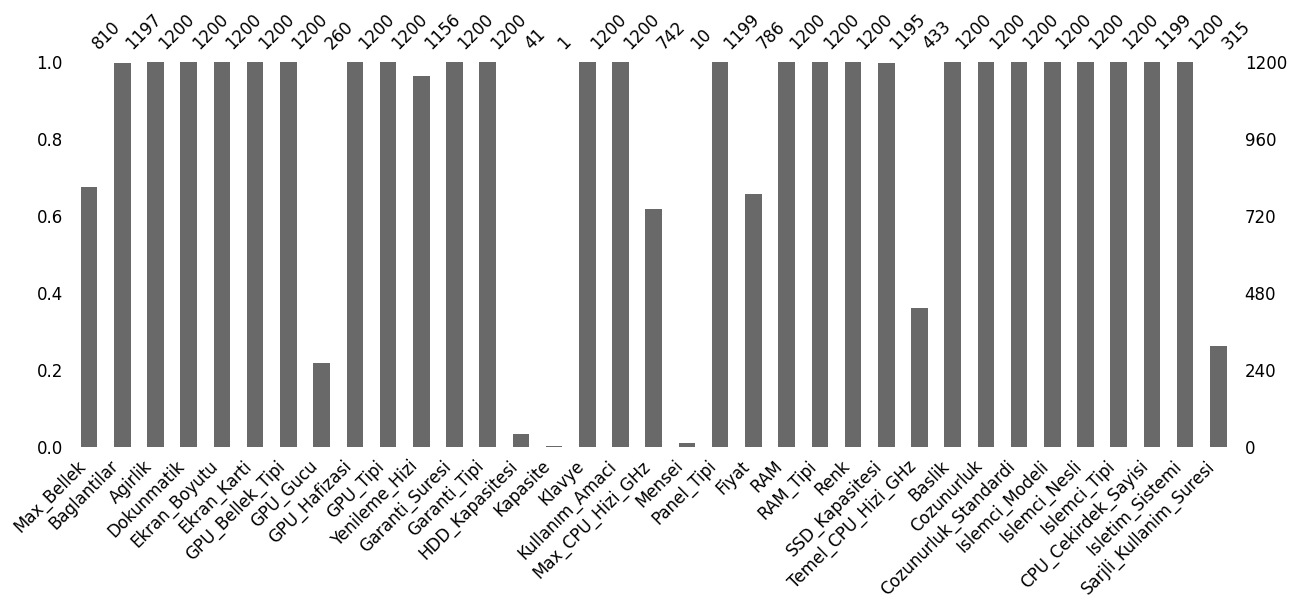

In [30]:
msno.bar(df = df,
         figsize = (15, 5),
         fontsize = 12);

In [31]:
# Yukarıda görülen grafiğe bakarak kapasite ve menşei'nin bizim yapacağımız modele bir faydası olmadığından ve verileri eksik olduğundan siliyoruz.
# Sütunları silme işlemleri (yeni isimlerle)
df.drop(columns="Max_Bellek", axis=1, inplace=True)
df.drop(columns="Baglantilar", axis=1, inplace=True)
df.drop(columns="Agirlik", axis=1, inplace=True)
df.drop(columns="Dokunmatik", axis=1, inplace=True)
df.drop(columns="Garanti_Suresi", axis=1, inplace=True)
df.drop(columns="Garanti_Tipi", axis=1, inplace=True)
df.drop(columns="Kapasite", axis=1, inplace=True)
df.drop(columns="Klavye", axis=1, inplace=True)
df.drop(columns="Kullanım_Amaci", axis=1, inplace=True)
df.drop(columns="Mensei", axis=1, inplace=True)
df.drop(columns="Temel_CPU_Hizi_GHz", axis=1, inplace=True)
df.drop(columns="Baslik", axis=1, inplace=True)
df.drop(columns="Cozunurluk", axis=1, inplace=True)
df.drop(columns="Cozunurluk_Standardi", axis=1, inplace=True)
df.drop(columns="Sarjli_Kullanim_Suresi", axis=1, inplace=True)

# 'Price' sütununu en sona taşımak
columns = [col for col in df.columns if col != 'Fiyat']  # 'Price' dışındaki sütunları al
columns.append('Fiyat')  # 'Price' sütununu sona ekle

# Yeni sütun sırasına göre DataFrame'i yeniden düzenle
df = df[columns]

save_to_excel(df)

Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.


In [32]:
print(list(df.columns))

['Ekran_Boyutu', 'Ekran_Karti', 'GPU_Bellek_Tipi', 'GPU_Gucu', 'GPU_Hafizasi', 'GPU_Tipi', 'Yenileme_Hizi', 'HDD_Kapasitesi', 'Max_CPU_Hizi_GHz', 'Panel_Tipi', 'RAM', 'RAM_Tipi', 'Renk', 'SSD_Kapasitesi', 'Islemci_Modeli', 'Islemci_Nesli', 'Islemci_Tipi', 'CPU_Cekirdek_Sayisi', 'Isletim_Sistemi', 'Fiyat']


In [33]:
len(df.columns)

20

In [34]:
'Kapasite' in df.columns

False

In [35]:
df.dtypes

Ekran_Boyutu            object
Ekran_Karti             object
GPU_Bellek_Tipi         object
GPU_Gucu               float64
GPU_Hafizasi            object
GPU_Tipi                object
Yenileme_Hizi          float64
HDD_Kapasitesi         float64
Max_CPU_Hizi_GHz       float64
Panel_Tipi              object
RAM                      int64
RAM_Tipi                object
Renk                    object
SSD_Kapasitesi         float64
Islemci_Modeli          object
Islemci_Nesli           object
Islemci_Tipi            object
CPU_Cekirdek_Sayisi    float64
Isletim_Sistemi         object
Fiyat                  float64
dtype: object

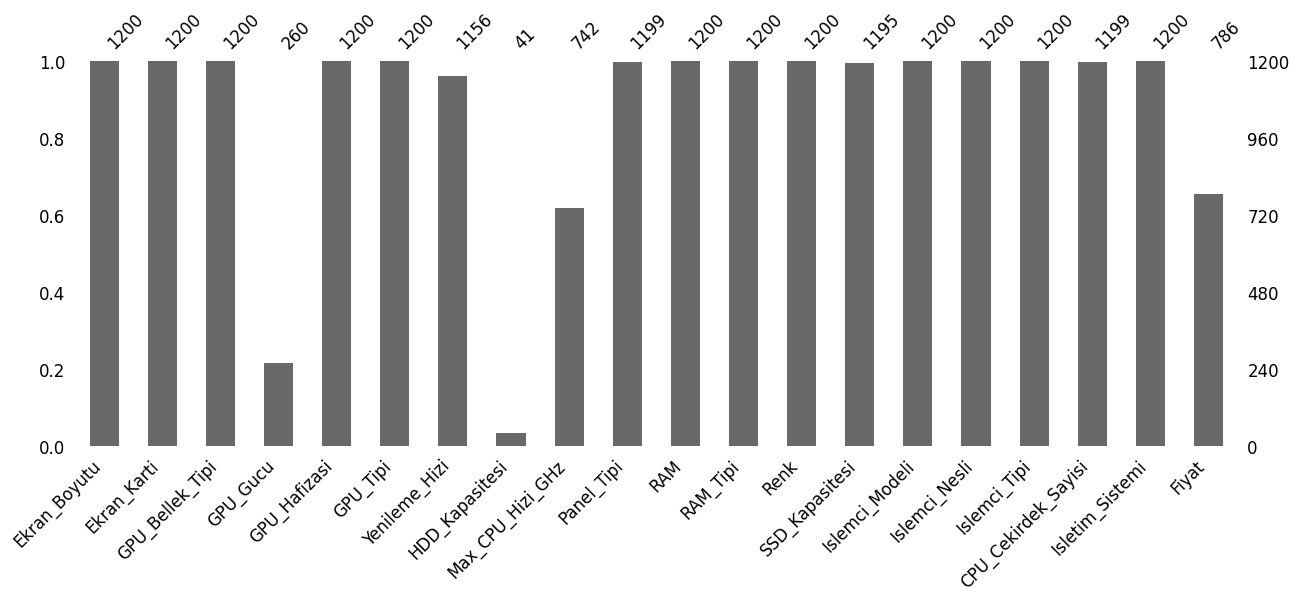

In [36]:
msno.bar(df = df,
         figsize = (15, 5),
         fontsize = 12);

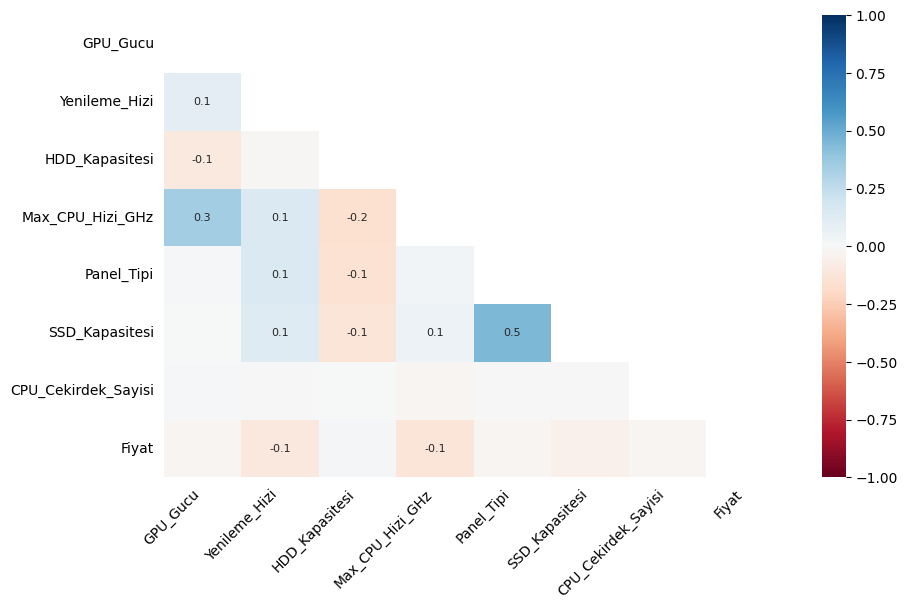

In [37]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

# 2.1 - Eksik Verilerin Silinmesi

Veri setinde bulunan eksik verilere müdahale yöntemlerinden birisi, eksik verilerin silinmesidir. Uygulaması oldukça kolay bir yöntem olsa da eksik verileri silmeden önce dikkat edilmesi gereken önemli hususlar vardır.

Eksik bir verinin bulunduğu gözlemi silmeya karar verebilmek için, bu eksikliğin doğal olmayan bir şekilde ortaya çıktığından emin olmamız gerekir. Örneğin elimizdeki bir araç veri setinde elektrikli araçlar için motor hacmi kolonunda Na değer bulunması doğal bir eksikliğe işaret eder. Bu durumda silme işlemi yerine uygun bir şekilde doldurmak tercih edilebilir.

Eksik veriler veri setinde kayda değer bir yüzdeyi oluşturuyorsa, eksik verilerin silinmesi durumunda veri setindeki birçok gözlemi kaybedeceğimiz unutulmamalıdır. Bu durumda veri seti içerisinde bize bilgi sağlayabilecek birçok veriyi de kaybetmiş olacağız. Verinin olabildiğince fazla olması, hem analitik yöntemler hem de makine öğrenmesi yöntemleri için oldukça önemli olduğuna göre, veri setinden olabildiğince az kayıp verecek yöntemler denemeliyiz.

In [38]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.

df.dropna(inplace = False)[:10]
#df = df.dropna()

,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,Yenileme_Hizi,HDD_Kapasitesi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,Islemci_Modeli,Islemci_Nesli,Islemci_Tipi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Fiyat


In [39]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,Yenileme_Hizi,HDD_Kapasitesi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,Islemci_Modeli,Islemci_Nesli,Islemci_Tipi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Fiyat
0,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,NaN,NaN,NaN,IPS,8,DDR5,Renkli,512.0,Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,34.999
1,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,120.0,NaN,NaN,VA,16,DDR5,Siyah,512.0,13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,34.899
2,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55.0,4 GB ve altı,Harici,144.0,NaN,4.7,IPS,16,DDR4,Siyah,500.0,12700H,12. Nesil,Intel Core i7,14.0,Free Dos,28.089
3,"15,6 inç",Nvidia GeForce RTX 4050,GDDR6,105.0,6 GB,Harici,144.0,NaN,4.4,Full HD,16,DDR5,Luna Gri,512.0,12450H,12. Nesil,Intel Core i5,8.0,Free Dos,34.999
4,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,4 GB ve altı,Harici,144.0,NaN,4.4,IPS,16,DDR4,Siyah,500.0,12450H,12. Nesil,Intel Core i5,8.0,Free Dos,26.499


# 2.2 - Eksik Verilerin Doldurulması

Eksik verilerin doldurulması kararı, silinmesi işleminde olduğu gibi hassas ve bilinçli bir şekilde değerlendirilmesi gereken bir karardır. Zira doldurma işlemi veride gürültü (noise) oluşturabilir ve verinin istatistiksel olarak güvenilirliğini zedeleyebilir. Analitik durumlar içinse yanlış bilgi çıkarımlarına sebebiyet verebilir. Bu nedenle en sağlıklı doldurma kararının alındığı durumlarda dahi bu yanlılık durumu mutlaka göz önünde bulundurulmalıdır.

In [40]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,Yenileme_Hizi,HDD_Kapasitesi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,Islemci_Modeli,Islemci_Nesli,Islemci_Tipi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Fiyat
0,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,NaN,NaN,NaN,IPS,8,DDR5,Renkli,512.0,Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,34.999
1,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,120.0,NaN,NaN,VA,16,DDR5,Siyah,512.0,13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,34.899
2,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55.0,4 GB ve altı,Harici,144.0,NaN,4.7,IPS,16,DDR4,Siyah,500.0,12700H,12. Nesil,Intel Core i7,14.0,Free Dos,28.089


In [41]:
df_fillna.isna().sum()

Ekran_Boyutu              0
Ekran_Karti               0
GPU_Bellek_Tipi           0
GPU_Gucu                940
GPU_Hafizasi              0
GPU_Tipi                  0
Yenileme_Hizi            44
HDD_Kapasitesi         1159
Max_CPU_Hizi_GHz        458
Panel_Tipi                1
RAM                       0
RAM_Tipi                  0
Renk                      0
SSD_Kapasitesi            5
Islemci_Modeli            0
Islemci_Nesli             0
Islemci_Tipi              0
CPU_Cekirdek_Sayisi       1
Isletim_Sistemi           0
Fiyat                   414
dtype: int64

In [42]:
print(len(df_fillna.columns))

20


## 2.2.1 - "Ekran Boyutu" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Ekran Boyutu" sütunundaki verilerin temizlenmesi ve metin (string) formatına dönüştürülmesi için yapılmıştır:

1. **Boşlukların Temizlenmesi**: `str.strip()` fonksiyonu kullanılarak, "Ekran Boyutu" sütunundaki baştaki ve sondaki boşluklar temizlenmiştir. Bu işlem, verinin daha düzgün bir şekilde işlenebilmesi için önemlidir.

2. **'İnç' İfadesinin Kaldırılması**: `str.replace()` fonksiyonu ile "Ekran Boyutu" sütunundaki her değerin sonunda yer alan 'inç' ifadesi kaldırılmıştır. Bu, sayısal bir analiz yapabilmek için gereklidir.

3. **Metin Olarak Saklanması**: `astype(str)` fonksiyonu kullanılarak, "Ekran Boyutu" sütunundaki tüm veriler metin (string) formatına dönüştürülmüştür. Bu sayede, sayısal olmayan değerler ve kalan veriler metin olarak saklanır.

4. **Verilerin Kaydedilmesi**: İşlem tamamlandığında, veri seti `save_to_excel()` fonksiyonu ile Excel dosyasına kaydedilmiştir (eğer isteniyorsa).

Sonuç olarak, "Ekran Boyutu" sütunundaki boşluklar temizlenmiş, 'inç' ifadesi kaldırılmış ve kalan veriler metin (string) olarak saklanmıştır.



In [43]:
# Ekran Boyutu sütunundaki boşlukları temizleyelim
df_fillna['Ekran_Boyutu'] = df_fillna['Ekran_Boyutu'].str.strip()

# Ekran Boyutu sütunundaki 'inç' ifadesini sonundan kaldıralım
df_fillna['Ekran_Boyutu'] = df_fillna['Ekran_Boyutu'].str.replace(r'inç$', '', regex=True)

# Kalan ifadeleri metin (string) olarak saklayalım
df_fillna['Ekran_Boyutu'] = df_fillna['Ekran_Boyutu'].astype(str)

# 'Belirtilmemiş' değerlerini boş string ("") ile değiştirme
df_fillna["Ekran_Boyutu"] = df_fillna["Ekran_Boyutu"].replace("Belirtilmemiş", "")

# Boş stringleri NaN ile değiştirelim ki fillna() kullanabilelim
df_fillna["Ekran_Boyutu"].replace("", pd.NA, inplace=True)

# Mod değeri ile eksik verileri dolduralım
mode_value = df_fillna['Ekran_Boyutu'].mode()[0]  # Mod değeri
df_fillna['Ekran_Boyutu'].fillna(mode_value, inplace=True)  # Eksik değerleri mod değeri ile doldur

# Sonrasında dosyayı kaydedelim
save_to_excel(df_fillna)

# İşlemin başarıyla tamamlandığını bildirelim
print("Ekran Boyutu sütunundaki 'inç' ifadeleri kaldırıldı, boşluklar temizlendi ve eksik veriler mod değeri ile dolduruldu.")


C:\Users\yusuf\AppData\Local\Temp\ipykernel_3384\2314169464.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna["Ekran_Boyutu"].replace("", pd.NA, inplace=True)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_3384\2314169464.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.
Ekran Boyutu sütunundaki 'inç' ifadeleri kaldırıldı, boşluklar temizlendi ve eksik veriler mod değeri ile dolduruldu.


## 2.2.2 - "Maksimum İşlemci Hızı (GHz)" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Maksimum İşlemci Hızı (GHz)" sütunundaki eksik (NaN) değerleri doldurmak için yapılmıştır:

1. **Ortalama (Mean) Değerinin Hesaplanması**: `mean()` fonksiyonu ile "Maksimum İşlemci Hızı (GHz)" sütununun ortalama değeri hesaplanmıştır. Bu değer, eksik hücrelerde kullanılmak üzere belirlenmiştir.

2. **Eksik Değerlerin Ortalama Değerle Doldurulması**: `fillna()` fonksiyonu ile sütundaki eksik (NaN) değerler, hesaplanan ortalama değerle doldurulmuştur. Bu işlem `inplace=True` parametresi ile doğrudan DataFrame üzerinde yapılmıştır, yani yeni bir değişken oluşturulmamıştır.

Sonuç olarak, "Maksimum İşlemci Hızı (GHz)" sütunundaki eksik değerler ortalama değerle doldurulmuş ve veri seti eksiksiz hale getirilmiştir.


In [44]:
# Maksimum İşlemci Hızı (GHz) sütununun ortalama (mean) değerini hesaplayalım
mean_islemci = df_fillna['Max_CPU_Hizi_GHz'].mean()

# Virgülden sonra yalnızca 1 basamağa yuvarlayalım
mean_islemci = round(mean_islemci, 1)

print(mean_islemci)

# Maksimum İşlemci Hızı (GHz) sütunundaki eksik değerleri ortalama değer ile dolduralım
df_fillna['Max_CPU_Hizi_GHz'].fillna(value=mean_islemci, inplace=True)

# Maksimum İşlemci Hızı (GHz)'nın 742 tane kaydı vardı. kaydı olanların ortalamasını alarak boş olan satırlara ekledik.

4.7


C:\Users\yusuf\AppData\Local\Temp\ipykernel_3384\2114824358.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Max_CPU_Hizi_GHz'].fillna(value=mean_islemci, inplace=True)


In [45]:
df_fillna['Max_CPU_Hizi_GHz']

0       4.7
1       4.7
2       4.7
3       4.4
4       4.4
       ... 
1195    4.9
1196    4.7
1197    4.7
1198    4.7
1199    4.7
Name: Max_CPU_Hizi_GHz, Length: 1200, dtype: float64

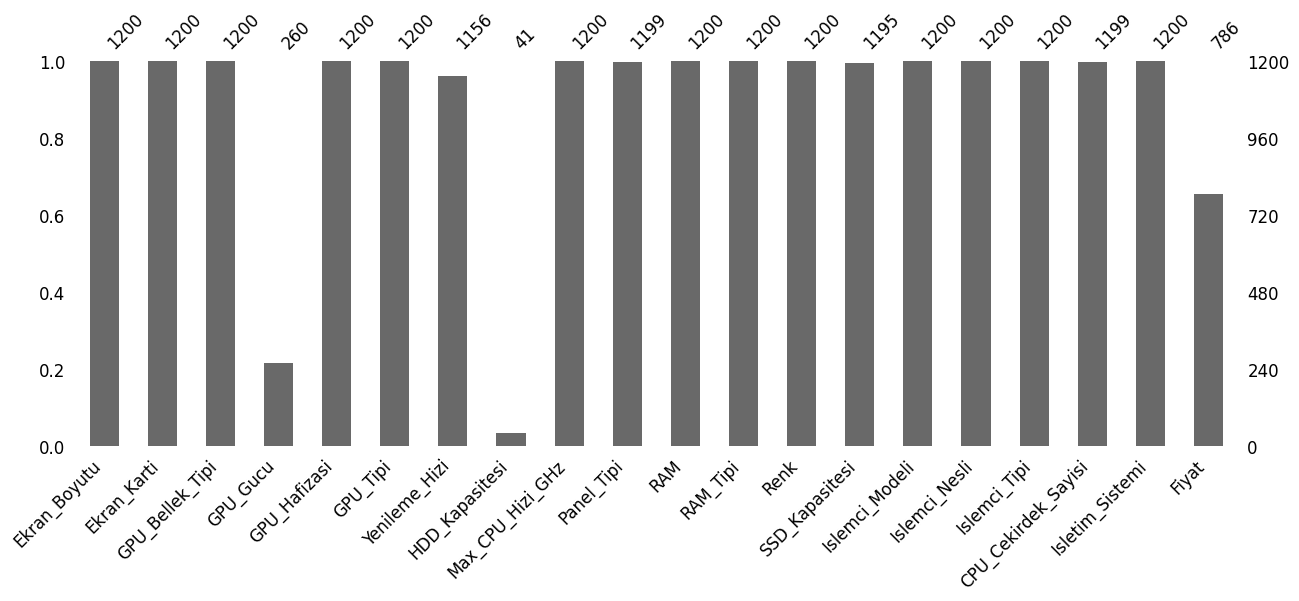

In [46]:
msno.bar(df = df_fillna,
         figsize = (15, 5),
         fontsize = 12);

In [47]:
df_fillna.describe().T

,count,mean,std,min,25%,50%,75%,max
GPU_Gucu,260.0,106.673077,35.070101,45.000,95.000,105.000,140.000,175.000
Yenileme_Hizi,1156.0,160.863322,38.729838,60.000,144.000,144.000,165.000,360.000
HDD_Kapasitesi,41.0,244.463415,252.476246,1.000,1.000,2.000,500.000,500.000
Max_CPU_Hizi_GHz,1200.0,4.724250,0.208822,4.200,4.700,4.700,4.900,5.000
RAM,1200.0,30.793333,22.997928,8.000,16.000,24.000,32.000,128.000
SSD_Kapasitesi,1195.0,1063.986611,940.029965,256.000,512.000,1024.000,1024.000,8192.000
CPU_Cekirdek_Sayisi,1199.0,12.558799,6.013869,1.000,8.000,12.000,16.000,24.000
Fiyat,786.0,48.739373,28.523317,15.049,32.224,41.599,49.999,238.399


## 2.2.3 - "Ekran Kartı Hafızası" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Ekran Kartı Hafızası" sütunundaki verileri temizlemek ve uygun hale getirmek için yapılmıştır:

1. **Baş ve Son Boşluklar Temizlendi**: `str.strip()` ile sütundaki tüm değerlerin başındaki ve sonundaki boşluklar kaldırıldı.

2. **"ve altı" İfadesi Silindi**: `str.replace(' ve altı', '')` ile tüm değerlerden `"ve altı"` ifadesi kaldırıldı.

3. **"Paylaşımlı" İfadesi Silindi**: `replace('Paylaşımlı', '')` ile `"Paylaşımlı"` ifadesi boş string ile değiştirildi.

4. **"GB" İfadesi Sonundan Kaldırıldı**: `str.replace(r'GB$', '')` ile tüm değerlerin sonundaki `"GB"` ifadesi silindi.

5. **Sayısal Değere Dönüştürüldü**: `pd.to_numeric()` ile sütun sayısal verilere dönüştürüldü ve geçersiz değerler `NaN` olarak işaretlendi.

Sonuç olarak, bu işlemler sayesinde sütun sadece sayısal değerleri içerecek şekilde temizlendi ve analiz için hazır hale getirildi.


In [48]:
# 'Ekran Kartı Hafızası' sütunundaki baştaki ve sondaki boşlukları temizleyip 've altı' ifadesini silme
df_fillna['GPU_Hafizasi'] = df_fillna['GPU_Hafizasi'].str.strip().str.replace(' ve altı', '', regex=False)
# Yorum: str.strip() baştaki ve sondaki boşlukları temizler.
# str.replace(' ve altı', '') 've altı' ifadesini siler.

# 'Ekran Kartı Hafızası' sütununda 'Paylaşımlı' ifadesini boş string ile değiştirme
df_fillna['GPU_Hafizasi'] = df_fillna['GPU_Hafizasi'].replace('Paylaşımlı', '')
# Yorum: 'Paylaşımlı' ifadesini boşlukla değiştirir. Bu, ekran kartı hafızasında paylaşımlı yazan hücrelerde boşluk bırakır.

# 'Ekran Kartı Hafızası' sütunundaki 'GB' ifadesini silme
df_fillna['GPU_Hafizasi'] = df_fillna['GPU_Hafizasi'].str.replace(r'GB$', '', regex=True)
# Yorum: 'GB' ifadesinin metnin sonunda olması durumunda (GB$ regex ile) siler. Bu, GB'nin yalnızca son kısmını kaldırır.

# 'Ekran Kartı Hafızası' sütununu sayısal (numeric) değere dönüştürme
df_fillna['GPU_Hafizasi'] = pd.to_numeric(df_fillna['GPU_Hafizasi'], errors='coerce')
# Yorum: 'Ekran Kartı Hafızası' sütunundaki değerleri sayısal (numeric) veri türüne dönüştürür. 
# Eğer dönüşüm mümkün değilse, o hücreyi 'NaN' yapar (errors='coerce').

# Sonrasında dosyayı tekrar kaydedin
save_to_excel(df_fillna)
# Yorum: Verilen DataFrame'i (df_fillna) yeni haliyle Excel dosyasına kaydeder. (save_to_excel fonksiyonu dışarıdan tanımlanmış olmalı).


Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.


In [49]:
df_fillna['GPU_Hafizasi'].head()

0    8.0
1    6.0
2    4.0
3    6.0
4    4.0
Name: GPU_Hafizasi, dtype: float64

In [50]:
# 'Ekran Kartı Hafızası' sütunundaki farklı değerleri görmek için
print(df_fillna['GPU_Hafizasi'].unique())

[ 8.  6.  4. nan 16. 12.]


In [51]:
# 'Ekran Kartı Hafızası' sütunundaki NaN değerlerinin sayısını görmek
nan_count_column = df_fillna['GPU_Hafizasi'].isna().sum()
print(f"'Ekran Kartı Hafızası' sütunundaki NaN sayısı: {nan_count_column}")

'Ekran Kartı Hafızası' sütunundaki NaN sayısı: 49


In [52]:

# 'Ekran Kartı Hafızası' sütunundaki en çok tekrar eden değeri bulma
most_frequent_value = df_fillna['GPU_Hafizasi'].mode()[0]

# 'Ekran Kartı Hafızası' sütunundaki boş değerleri ("" veya " ") NaN ile değiştirme
df_fillna['GPU_Hafizasi'] = df_fillna['GPU_Hafizasi'].replace(['', ' '], pd.NA)

# NaN hücrelerini en çok tekrar eden değerle doldurma
df_fillna['GPU_Hafizasi'] = df_fillna['GPU_Hafizasi'].fillna(most_frequent_value)

# Kaydetme fonksiyonu
save_to_excel(df_fillna)

# Sonuçları kontrol etme
print(f"En çok tekrar eden değer: {most_frequent_value}")



Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.
En çok tekrar eden değer: 8.0


In [53]:
df_fillna['GPU_Hafizasi'].unique()

array([ 8.,  6.,  4., 16., 12.])

## 2.2.4 - "Ekran Kartı Gücü" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Ekran Kartı Gücü" sütunundaki eksik (NaN) değerleri doldurmak için yapılmıştır:

1. **En Sık (Mode) Değeri Hesaplama**: `mean()` fonksiyonu yerine `mode()` kullanarak "Ekran Kartı Gücü" sütunundaki en sık tekrar eden değeri bulmak daha doğru olacaktır. Ancak burada `mean()` yerine `mode()` kullanmamışız ve yanlış bir işlem yapılmış. Bunu düzeltmek için, `mode()` fonksiyonu kullanılmalı.

2. **Eksik (NaN) Değerleri Mode ile Doldurma**: `fillna()` fonksiyonu ile sütundaki eksik (NaN) değerler, en sık tekrar eden değerle doldurulmuştur.

3. **Eksik Değerlerin Durumunu Kontrol Etme**: `isna().sum()` fonksiyonu kullanılarak sütundaki eksik (NaN) değerlerin sayısı kontrol edilmiştir.

4. **Veriyi Kaydetme**: Temizlenen veriler, `save_to_excel()` fonksiyonu ile Excel dosyasına kaydedilmiştir.

Bu işlemler sonucunda, "Ekran Kartı Gücü" sütunundaki eksik veriler en sık tekrar eden değerle doldurulmuş ve veri seti kaydedilmiştir.


In [54]:
df_fillna[['GPU_Gucu']][100:300]

,GPU_Gucu
100,NaN
101,NaN
102,NaN
103,NaN
104,NaN
...,...
295,120.0
296,105.0
297,NaN
298,NaN


In [55]:
# Ekran Kartı Gücü sütununun en sık (mode) değerini bulalım
ekran_karti_mode = int(df_fillna['GPU_Gucu'].mean())

# Ekran Kartı Gücü sütunundaki eksik değerleri mode ile dolduralım
df_fillna['GPU_Gucu'] = df_fillna['GPU_Gucu'].fillna(value=ekran_karti_mode)

# Veriyi Excel dosyasına kaydedelim
save_to_excel(df_fillna)

print("Veriler Excel'e kaydedildi.")

Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.
Veriler Excel'e kaydedildi.


In [56]:
df_fillna[['GPU_Gucu']][:20]

,GPU_Gucu
0,106.0
1,106.0
2,55.0
3,105.0
4,106.0
5,106.0
6,106.0
7,106.0
8,106.0
9,106.0


In [57]:
# Eksik değerlerin son durumunu kontrol edelim
print("Eksik değerler (NaN) sayısı:", df_fillna.isna().sum())

Eksik değerler (NaN) sayısı: Ekran_Boyutu              0
Ekran_Karti               0
GPU_Bellek_Tipi           0
GPU_Gucu                  0
GPU_Hafizasi              0
GPU_Tipi                  0
Yenileme_Hizi            44
HDD_Kapasitesi         1159
Max_CPU_Hizi_GHz          0
Panel_Tipi                1
RAM                       0
RAM_Tipi                  0
Renk                      0
SSD_Kapasitesi            5
Islemci_Modeli            0
Islemci_Nesli             0
Islemci_Tipi              0
CPU_Cekirdek_Sayisi       1
Isletim_Sistemi           0
Fiyat                   414
dtype: int64


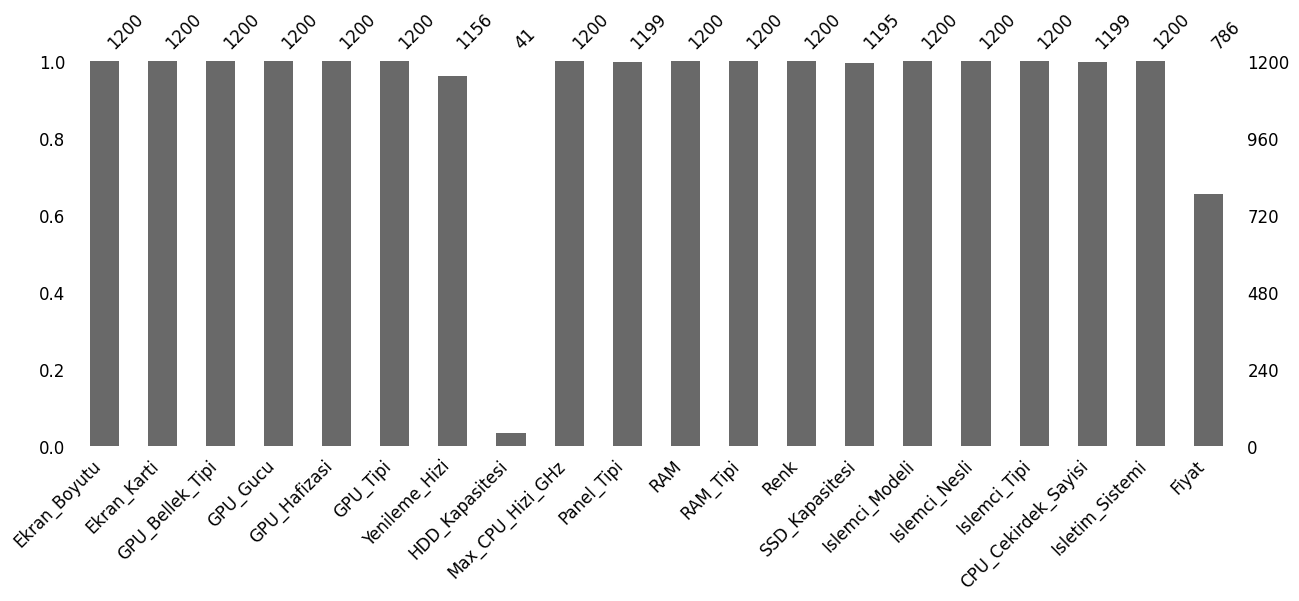

In [58]:
msno.bar(df = df_fillna,
         figsize = (15, 5),
         fontsize = 12);

## 2.2.5 - "Ekran Yenileme Hızı" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Ekran Yenileme Hızı" sütunundaki eksik (NaN) değerleri doldurmak için yapılmıştır:

1. **Ekran Yenileme Hızının Ortalama (Mean) Değerinin Hesaplanması**: `mode()` fonksiyonu kullanılarak "Ekran Yenileme Hızı" sütununun en çok tekrar eden değeri hesaplanmıştır. Bu tekrar eden değer, eksik (NaN) değerleri doldurmak için kullanılacaktır.

2. **Eksik Değerlerin En Çok Tekrar Eden Değerle Doldurulması**: `fillna()` fonksiyonu ile, sütundaki eksik (NaN) değerler hesaplanan ortalama değer ile doldurulmuştur. Bu işlem `inplace=True` parametresi ile doğrudan DataFrame üzerinde gerçekleştirilmiştir, yani yeni bir değişken oluşturulmamıştır.

Sonuç olarak, "Ekran Yenileme Hızı" sütunundaki eksik değerler ortalama değeriyle doldurulmuş ve veri seti eksiksiz hale getirilmiştir.


In [ ]:
# "Ekran Yenileme Hızı" sütununun ortalama (mean) değerini hesaplayalım
mode_ekran_yenileme = df_fillna['Yenileme_Hizi'].mode()
print(mode_ekran_yenileme)

# Ekran Yenileme Hızı sütunundaki eksik değerleri ortalama değer ile dolduralım
df_fillna['Yenileme_Hizi'].fillna(value=mode_ekran_yenileme, inplace=True)

save_to_excel(df = df_fillna)

0    144.0
Name: Yenileme_Hizi, dtype: float64


C:\Users\yusuf\AppData\Local\Temp\ipykernel_3384\2661508062.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Yenileme_Hizi'].fillna(value=mode_ekran_yenileme, inplace=True)


In [ ]:
# Sonuçları kontrol etmek için
print("Eksik değerler (NaN) sayısı:", df_fillna.isna().sum())

# Hard Disk Kapasitesi sil
Çok az veri olduğu için silinmiştir.

In [ ]:
df_fillna.drop(columns="HDD_Kapasitesi", axis=1, inplace=True)
save_to_excel(df= df_fillna)

In [ ]:
list(df_fillna.columns)

# İşlemci Modeli Belirtilmemişse boş bırak

In [ ]:
# 'Belirtilmemiş' değerlerini boş string ("") ile değiştirme
df_fillna["Islemci_Modeli"] = df_fillna["Islemci_Modeli"].replace("Belirtilmemiş", "")

# Boş stringleri NaN ile değiştirelim ki fillna() kullanabilelim
df_fillna["Islemci_Modeli"].replace("", pd.NA, inplace=True)

# 'İşlemci Modeli' sütunundaki en sık tekrar eden değeri (mode) bulma
mode_islemci_değeri = df_fillna["Islemci_Modeli"].mode()[0]

# Mode değerini yazdıralım
print(f"En sık tekrar eden değer: {mode_islemci_değeri}")

# Eksik (NaN) değerleri en sık tekrarlanan değerle doldurma
df_fillna["Islemci_Modeli"].fillna(value=mode_islemci_değeri, inplace=True)

# Dosyayı kaydedelim
save_to_excel(df=df_fillna)

# İşlemin tamamlandığını belirten mesaj
print("İşlemci Modeli sütunundaki eksik veriler dolduruldu ve dosya kaydedildi.")


In [ ]:
df_fillna["Islemci_Modeli"].head()

In [ ]:
msno.bar(df = df_fillna,
         figsize = (15, 5),
         fontsize = 12);

In [ ]:
df = df_fillna.copy()
df.info()

In [ ]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

In [ ]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

In [ ]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

In [ ]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = df["Islemci_Modeli"].unique().tolist()[::-1]
comp_categories

DataFrame'indeki her bir sütun için histogramlar çizecek ve her histogramın üzerine bir kernel density estimate (KDE) eğrisi ekleyecek. Bu histogramlar, her sütunun dağılımını görsel olarak gösterecek.

In [ ]:
# Get the number of columns in the dataframe
num_columns = len(df.columns)

# Calculate number of rows and columns needed for subplots
ncols = 3  # You can adjust this as needed
nrows = int(np.ceil(num_columns / ncols))

plt.figure(figsize=(20, 5 * nrows))  # Adjust figure size dynamically based on the number of rows

ind = 1
for variable in df.columns:
    plt.subplot(nrows, ncols, ind)
    sns.histplot(x=df[variable], kde=True, color="green")
    plt.title(variable)
    plt.xlabel('')
    ind += 1

plt.tight_layout()  # Automatically adjust subplots to prevent overlap
plt.show()


GPU BELLEK TİPİ SÜTUN DÜZENLEMESİ

In [ ]:
# 'Belirtilmemiş' değerlerini boş string ("") ile değiştirme
df["GPU_Bellek_Tipi"] = df["GPU_Bellek_Tipi"].replace("Belirtilmemiş", "")

# Boş stringleri NaN ile değiştirelim ki fillna() kullanabilelim
df["GPU_Bellek_Tipi"].replace("", pd.NA, inplace=True)

mode_gpu_bellek_tipi = df["GPU_Bellek_Tipi"].mode()[0]

# Mode değerini yazdıralım
print(f"En sık tekrar eden değer: {mode_gpu_bellek_tipi}")

# Eksik (NaN) değerleri en sık tekrarlanan değerle doldurma
df["GPU_Bellek_Tipi"].fillna(value=mode_gpu_bellek_tipi, inplace=True)

# Dosyayı kaydedelim
save_to_excel(df=df)

# İşlemin tamamlandığını belirten mesaj
print("İşlemci Modeli sütunundaki eksik veriler dolduruldu ve dosya kaydedildi.")


In [ ]:
df["GPU_Bellek_Tipi"].unique()

In [ ]:
df["GPU_Hafizasi"].unique()

In [ ]:
df["GPU_Tipi"].unique()

In [ ]:
df["Yenileme_Hizi"].unique()

YENİLEME HIZI SÜTUNUNU DÜZENLİYORUZ

In [ ]:
df['Yenileme_Hizi'] = df['Yenileme_Hizi'].ffill()
save_to_excel(df=df)

In [ ]:
df["Yenileme_Hizi"].unique()

In [ ]:
df["Panel_Tipi"].unique()

In [ ]:
# 'Belirtilmemiş' değerlerini boş string ("") ile değiştirme
df["Panel_Tipi"] = df["Panel_Tipi"].replace("Yok", "")

# Boş stringleri NaN ile değiştirelim ki fillna() kullanabilelim
df["Panel_Tipi"].replace("", pd.NA, inplace=True)

mode_panel_tipi = df["Panel_Tipi"].mode()[0]

# Mode değerini yazdıralım
print(f"En sık tekrar eden değer: {mode_panel_tipi}")

# Eksik (NaN) değerleri en sık tekrarlanan değerle doldurma
df["Panel_Tipi"].fillna(value=mode_panel_tipi, inplace=True)

# Dosyayı kaydedelim
save_to_excel(df=df)

# İşlemin tamamlandığını belirten mesaj
print("İşlemci Modeli sütunundaki eksik veriler dolduruldu ve dosya kaydedildi.")


In [ ]:
list(df.columns)

In [ ]:
df["Renk"].unique()

RAM TİPİ DÜZENLE

In [ ]:
# 'Belirtilmemiş' değerlerini boş string ("") ile değiştirme
df["RAM_Tipi"] = df["RAM_Tipi"].replace("Belirtilmemiş", "")

# Boş stringleri NaN ile değiştirelim ki fillna() kullanabilelim
df["RAM_Tipi"].replace("", pd.NA, inplace=True)

mode_panel_tipi = df["RAM_Tipi"].mode()[0]

# Mode değerini yazdıralım
print(f"En sık tekrar eden değer: {mode_panel_tipi}")

# Eksik (NaN) değerleri en sık tekrarlanan değerle doldurma
df["RAM_Tipi"].fillna(value=mode_panel_tipi, inplace=True)

# Dosyayı kaydedelim
save_to_excel(df=df)

# İşlemin tamamlandığını belirten mesaj
print("İşlemci Modeli sütunundaki eksik veriler dolduruldu ve dosya kaydedildi.")

RENK DÜZENLEME 

In [ ]:
# Verileri küçük harfe çevirme
df['Renk'] = df['Renk'].str.lower()

# Renk isimlerini standartlaştırma
df['Renk'] = df['Renk'].replace({
    'siyah': 'siyah',
    'mika gümüş': 'mika gümüş',
    'gri': 'gri',
    'mavi': 'mavi',
    'metalik': 'metalik',
    'beyaz': 'beyaz',
    'belirtilmemiş': 'belirtilmemiş',
    'cloud gri': 'gri',
    'black': 'siyah',
    'gümüş': 'mika gümüş',
    'graphite black': 'siyah',
    'lacivert': 'mavi',
    'blue': 'mavi',
    'gray': 'gri',
    'storm grey': 'gri',
    'uzay gri': 'gri',
    'oniks grisi': 'gri',
    'gölge siyahı': 'siyah',
    'tutulma siyahı': 'siyah',
    'çok renkli': 'çok renkli',
    'luna gri': 'gri',
    'eclipse gray': 'gri',
    'jaeger gray': 'gri',
    'grafiti siyah': 'siyah',
    'onyx grey': 'gri',
    'metalik uzay grisi': 'gri',
    'koyu gri': 'gri',
    'koyu mavi': 'mavi',
    'koyu gri-siyah': 'siyah',
    'mavi': 'mavi'
})

save_to_excel(df=df)
# Yeniden düzenlenmiş veriyi kontrol etme
print(df['Renk'].unique())

In [ ]:
df['Renk'] = df['Renk'].str.lower()

# En sık görülen değeri bulma (mod)
most_frequent_color = df['Renk'].mode()[0]  # mode() en çok tekrar eden değeri döndürür

# "Belirtilmemiş" değerlerini en sık görülen değerle doldurma
df['Renk'] = df['Renk'].replace('belirtilmemiş', most_frequent_color)

# Düzenlenmiş veriyi bir Excel dosyasına kaydetme
save_to_excel(df=df)

# Sonuçları kontrol etme
print("En sık görülen renk:", most_frequent_color)
print("Düzenlenmiş Renkler:\n", df['Renk'].unique())

SSD KAPASİTESİ

In [ ]:
df["SSD_Kapasitesi"].unique()

In [ ]:
median_value = df['SSD_Kapasitesi'].median()  # Medyan değeri hesapla
df['SSD_Kapasitesi'] = df['SSD_Kapasitesi'].fillna(median_value)  # NaN değerleri medyan ile doldur
save_to_excel(df=df)

İŞLEMCİ NESLİ

In [ ]:
df["Islemci_Nesli"].unique()

In [ ]:
# 'Belirtilmemiş' değerlerini boş string ("") ile değiştirme
df["Islemci_Nesli"] = df["Islemci_Nesli"].replace("Belirtilmemiş", "")

# Boş stringleri NaN ile değiştirelim ki fillna() kullanabilelim
df["Islemci_Nesli"].replace("", pd.NA, inplace=True)

df['Islemci_Nesli'] = df['Islemci_Nesli'].fillna(method='ffill')
save_to_excel(df=df)

In [ ]:
df["Islemci_Nesli"].unique()

CPU_Cekirdek_Sayisi DÜZELT


In [ ]:
df["CPU_Cekirdek_Sayisi"].unique()

In [ ]:
# 1. Adım: Verideki sayıların sonundaki noktaları temizleme
df['CPU_Cekirdek_Sayisi'] = df['CPU_Cekirdek_Sayisi'].astype(str).str.replace(r'\.$', '', regex=True).astype(float)

# 2. Adım: Eksik (NaN) değerleri ortalama ile doldurma
mean_value = df['CPU_Cekirdek_Sayisi'].mean()  # Ortalama değeri hesapla
df['CPU_Cekirdek_Sayisi'] = df['CPU_Cekirdek_Sayisi'].fillna(mean_value)  # NaN değerleri ortalama ile doldur

# 3. Adım: Sayıları tam sayıya yuvarlamak
df['CPU_Cekirdek_Sayisi'] = df['CPU_Cekirdek_Sayisi'].round().astype(int)

save_to_excel(df=df)


In [ ]:
df["CPU_Cekirdek_Sayisi"].unique()

In [ ]:
df["Islemci_Modeli"]

In [ ]:
df["Islemci_Tipi"]

In [ ]:
# Yeni 'Islemci' sütununu oluşturun
df["Islemci"] = df["Islemci_Tipi"] + " " + df["Islemci_Modeli"]

# 'Islemci_Tipi', 'Islemci_Modeli' ve 'Islemci_Nesli' sütunlarını silin
df = df.drop(columns=["Islemci_Tipi", "Islemci_Modeli", "Islemci_Nesli"])

# 'Islemci' sütununu son sütundan bir önceki sütuna taşıma
columns = list(df.columns)
# Son sütunun indeksini bul
last_column_index = len(columns) - 1
# 'Islemci' sütununun indeksini bul
islemci_index = columns.index("Islemci")

# 'Islemci' sütununu bir önceki sütuna taşıma
columns.insert(last_column_index - 1, columns.pop(islemci_index))

# Sütun sırasını güncelleme
df = df[columns]

# Excel'e kaydetme
save_to_excel(df=df)

In [ ]:
df["Islemci"]

In [ ]:
list(df.columns)

In [ ]:
len(df.columns)

In [ ]:
df["Fiyat"]

In [ ]:
# Her sütun için benzersiz değerlerin sayısını hesaplayın
unique_counts = df.nunique()

# Bar grafiğini oluşturun
plt.figure(figsize=(12, 6))
unique_counts.plot(kind='bar', color='skyblue')

# Başlık ve etiketler
plt.title('Sütunlardaki Benzersiz Değerlerin Sayısı')
plt.xlabel('Sütunlar')
plt.ylabel('Benzersiz Değer Sayısı')

# Grafiği göster
plt.xticks(rotation=90)  # X eksenindeki etiketleri döndür
plt.tight_layout()  # Etiketlerin kesilmemesi için düzenleme
plt.show()

In [ ]:
# Her sütundaki boş olmayan (NaN olmayan) değerlerin sayısını hesaplayın
non_na_counts = df.notna().sum()

# Bar grafiğini oluşturun
plt.figure(figsize=(12, 6))
non_na_counts.plot(kind='bar', color='lightcoral')

# Başlık ve etiketler
plt.title('Her Sütundaki Boş Olmayan Değerlerin Sayısı')
plt.xlabel('Sütunlar')
plt.ylabel('Boş Olmayan Değer Sayısı')

# Grafiği göster
plt.xticks(rotation=90)  # X eksenindeki etiketleri döndür
plt.tight_layout()  # Etiketlerin kesilmemesi için düzenleme
plt.show()

In [ ]:
df["Ekran_Boyutu"].unique()

In [ ]:
df['Fiyat'] = df['Fiyat'].fillna(method='ffill')
save_to_excel(df=df)

In [ ]:
df["Fiyat"].unique()

In [ ]:
# Fiyat sütunundaki her hücreyi string'e çevir ve virgül yerine nokta koy
df['Fiyat'] = df['Fiyat'].astype(str).apply(lambda x: x.replace(',', '.'))

# Fiyat sütunundaki 5 karakter uzunluğundaki değerlerin sonuna '0' ekle
df['Fiyat'] = df['Fiyat'].apply(lambda x: x + '0' if len(x.replace('.', '')) == 5 else x)

# Fiyatları numerik (float) formata dönüştür
df['Fiyat'] = pd.to_numeric(df['Fiyat'])
save_to_excel(df=df)

In [ ]:
df["Fiyat"].head(n=20)

In [ ]:
# Dosyaları oku
notebook = pd.read_excel('notebook.xlsx')


# "price" sütununu "fiyat" sütununa aktar 
# veriler bozulduğu için değiştirdik.
df['Fiyat'] = notebook['Price']

# Yeni veriyi kaydet
save_to_excel(df=df)

In [ ]:
# "fiyat" sütunundaki eksik verileri bir üstteki değer ile doldur
df['Fiyat'] = df['Fiyat'].ffill()
save_to_excel(df=df)

In [ ]:
# Fazladan boşlukları kaldır
df["Ekran_Boyutu"] = df["Ekran_Boyutu"].str.strip()

# Değiştirme işlemleri için mapping sözlüğü
mapping = {
    '15,4': '15,6',
    '18': '17,3',
    '7,0': '17,3',
    '17': '17,3',
    '16,3': '16,1',
    '16': '16,1'
}

# Değiştirme işlemi
df["Ekran_Boyutu"] = df["Ekran_Boyutu"].replace(mapping)

# Eşsiz değerleri kontrol et
print(df["Ekran_Boyutu"].unique())

# Excel'e kaydetme işlemi
save_to_excel(df=df)

In [ ]:
df["Ekran_Boyutu"].unique()